<a href="https://colab.research.google.com/github/Subhranshu-123/BIKE2/blob/main/subhranshu_sekhar_paniCopy_of_preprocessing_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔰 Step 1: Import Required LibrariesThese libraries are essential for data handling, visualizations, and preprocessing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")



# Show all rows and columns, and wider columns
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_colwidth', None)     # Show full string content
pd.set_option('display.width', 1000)            # Set display width

## 📂 Step 2: Load DatasetUse `pandas.read_csv()` to load the dataset. Ensure the file is accessible.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 🔎 Step 3: Sanity Checks
### ✅ Check data shape, types, and missing values.
### To assess completeness and understand structure.

In [6]:
# ✅ STEP 3: BASIC DATA CHECKS

print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Missing values count
missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0])


Shape: (2938, 22)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  


In [7]:
# ✅ STEP 4: PERCENTAGE OF MISSING DATA

# %Missing = (missing_count / total_rows) * 100
missing_percent = (df.isnull().sum() / df.shape[0]) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 thinness 5-9 years                 1.157250
 thinness  1-19 years               1.157250
 BMI                                1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64


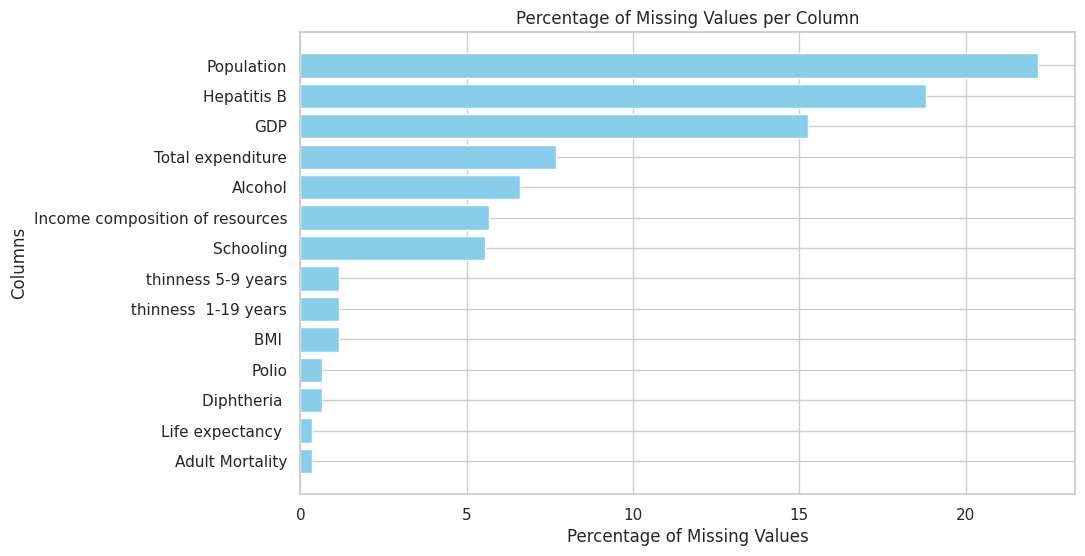

In [12]:
# Select missing percentages greater than 0
missing_percent_to_plot = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(missing_percent_to_plot.index, missing_percent_to_plot.values, color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values per Column')
plt.gca().invert_yaxis()  # Invert y-axis to show highest percentage at the top
plt.show()

# 📝 Assignment:
# Visualize missing percentage using a horizontal bar chart.

In [ ]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()



['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
# ✅ STEP 5: HANDLE MISSING VALUES

# Why? Missing values can bias or crash models.

# 📌 Strategy 1: Fill numeric columns with median
num_median_cols = ['BMI', 'Polio', 'Income composition of resources']
for col in num_median_cols:
    df[col].fillna(df[col].median(), inplace=True)

# 📌 Strategy 2: Fill categorical with mode
df['Status'].fillna(df['Status'].mode()[0], inplace=True)

# 📌 Strategy 3: Use KNN Imputer for remaining numerical columns
knn_cols = df.select_dtypes(include='number').columns
imputer = KNNImputer(n_neighbors=3)
df[knn_cols] = imputer.fit_transform(df[knn_cols])


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:

# ✅ STEP 6: DUPLICATES & GARBAGE VALUE CHECK

print("Duplicate Rows:", df.duplicated().sum())

# Checking object columns for garbage entries
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} - Unique Values:\n", df[col].value_counts(dropna=False))


Duplicate Rows: 0

Country - Unique Values:
 Country
Afghanistan                                             16
Albania                                                 16
Algeria                                                 16
Angola                                                  16
Antigua and Barbuda                                     16
Argentina                                               16
Armenia                                                 16
Australia                                               16
Austria                                                 16
Azerbaijan                                              16
Bahamas                                                 16
Bahrain                                                 16
Bangladesh                                              16
Barbados                                                16
Belarus                                                 16
Belgium                                                 16
Bel

# Assignment:
# Create a function that reports percentage of unique values in object-type columns.

In [16]:
#ASSIGNMENT

import pandas as pd

def report_unique_percentage_object_columns(df):

    unique_percentages = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            num_unique = df[col].nunique()
            total_rows = len(df)
            if total_rows > 0:
                percentage = (num_unique / total_rows) * 100
            else:
                percentage = 0.0  # Handle empty DataFrame case
            unique_percentages[col] = percentage
    return pd.Series(unique_percentages)
report_unique_percentage_object_columns(df)


,0
Country,6.569095
Status,0.068074


In [ ]:
# prompt: write code to remove duplicate values

df.drop_duplicates(inplace=True)
print("Duplicate Rows after removal:", df.duplicated().sum())

Duplicate Rows after removal: 0


In [ ]:
# ✅ STEP 7: DESCRIPTIVE STATISTICS

# # For numerical
# print(df.describe().T)

# # For categorical
# print(df.describe(include='object'))


In [ ]:
# ✅ STEP 8: SKEWNESS ANALYSIS

# Skewness measures asymmetry of distribution
# Formula: γ = (mean - median) / std deviation

# Skewed features may affect models, need transformation
from scipy.stats import skew

skew_vals = df.select_dtypes(include='number').apply(lambda x: skew(x.dropna()))
print("Highly Skewed Columns:\n", skew_vals[abs(skew_vals) > 1])


Highly Skewed Columns:
 Adult Mortality                     1.176283
infant deaths                       9.781965
percentage expenditure              4.649676
Hepatitis B                        -1.897973
Measles                             9.436511
under-five deaths                   9.490216
Polio                              -2.107833
Diphtheria                         -2.081226
HIV/AIDS                            5.393357
GDP                                 3.447996
Population                         16.846540
thinness  1-19 years                1.701364
thinness 5-9 years                  1.768359
Income composition of resources    -1.211907
dtype: float64


| Skewness Type                | Visual Description                                     | Typical Histogram Appearance        |
|------------------------------|-------------------------------------------------------|-------------------------------------|
| Symmetrical (Zero Skew)      | Mean ≈ median ≈ mode; left and right sides mirror     | Bell-shaped, centered               |
| Positive Skew (Right-Skewed) | Tail extends toward larger values (right side), mean > median | Peak on left, long tail on right     |
| Negative Skew (Left-Skewed)  | Tail extends toward smaller values (left side), mean < median | Peak on right, long tail on left      |


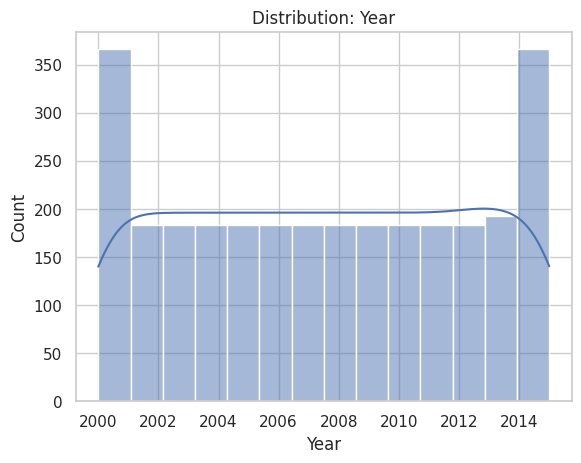

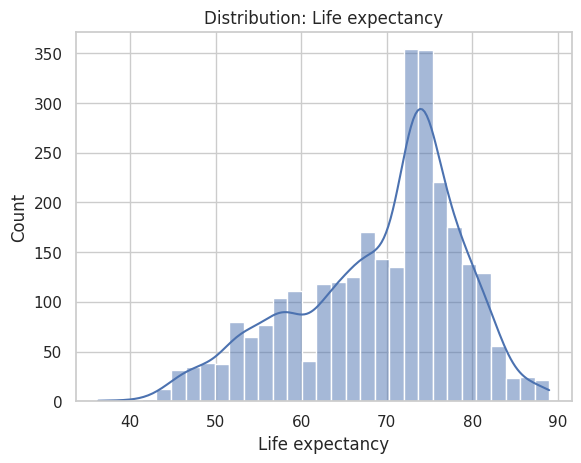

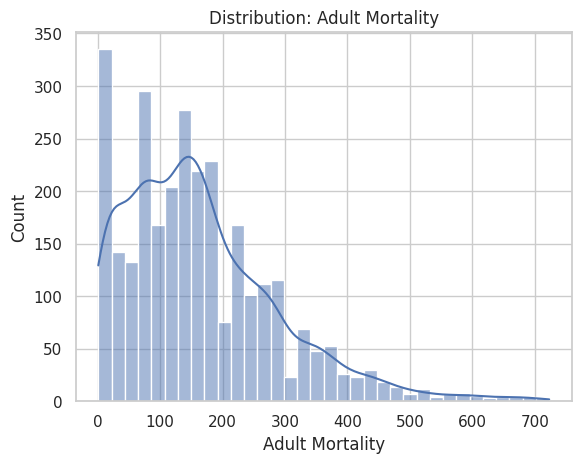

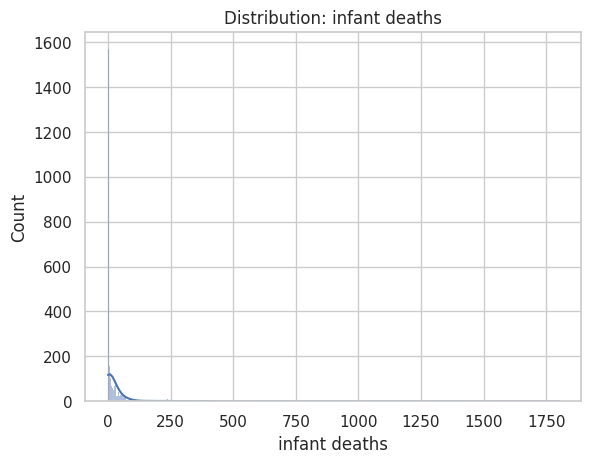

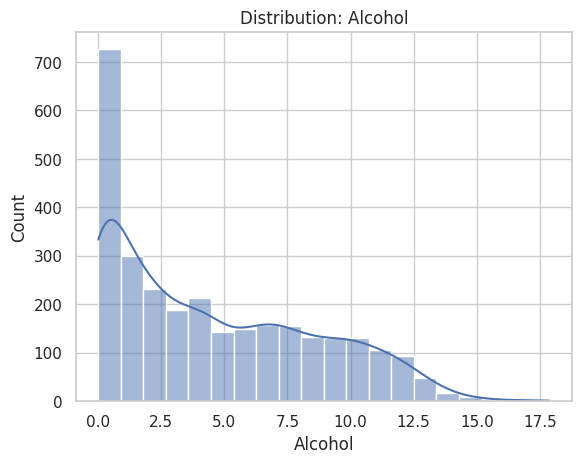

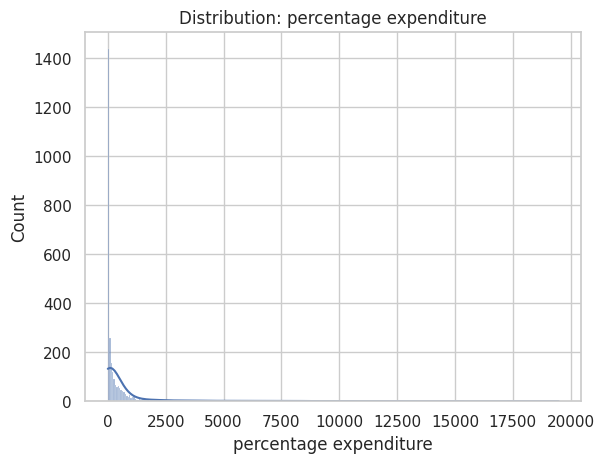

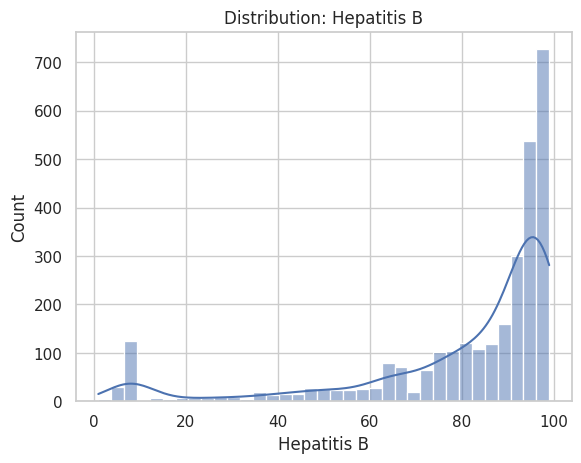

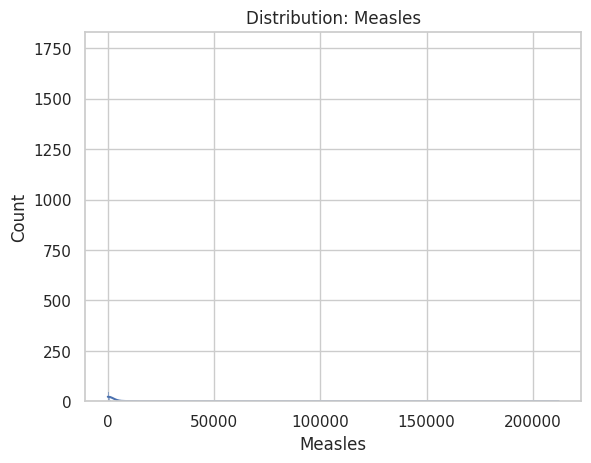

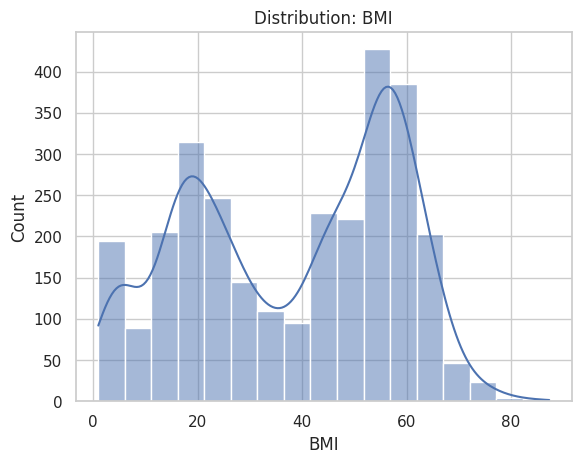

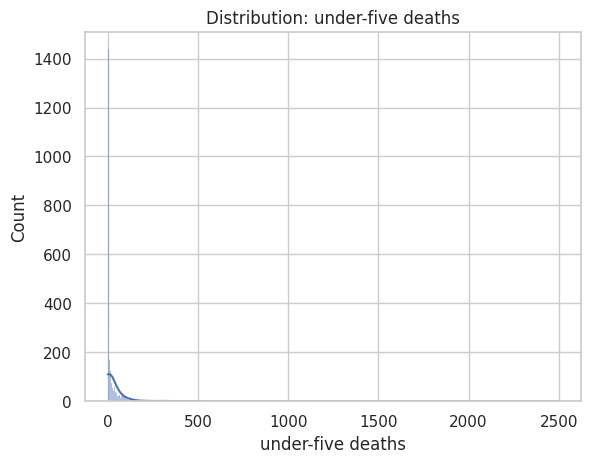

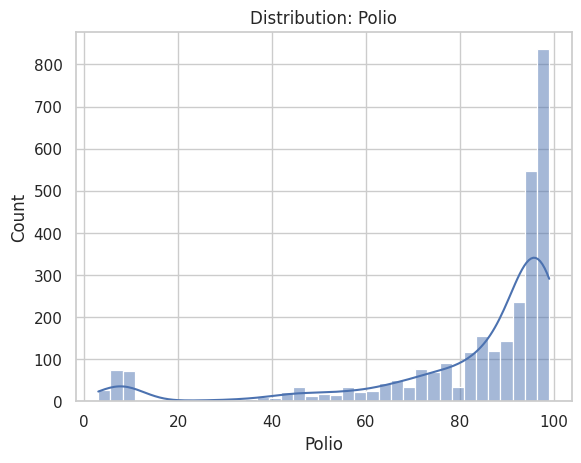

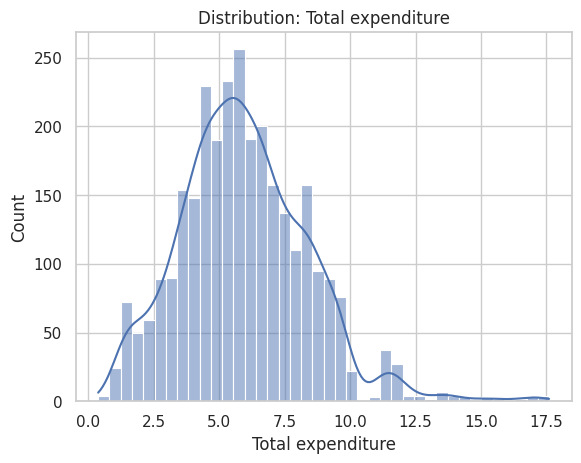

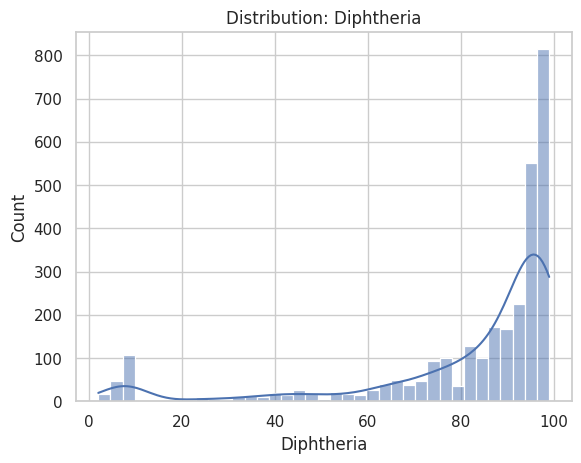

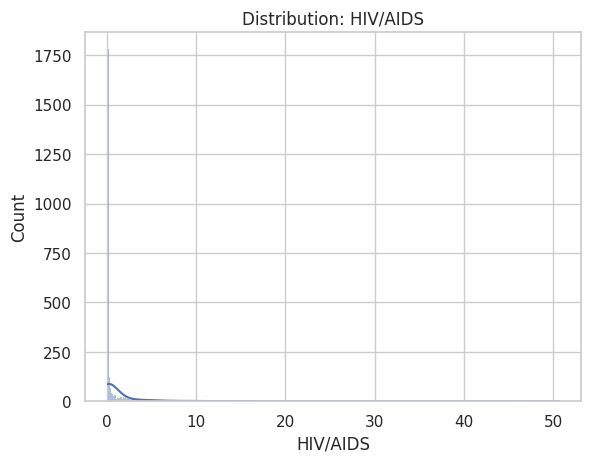

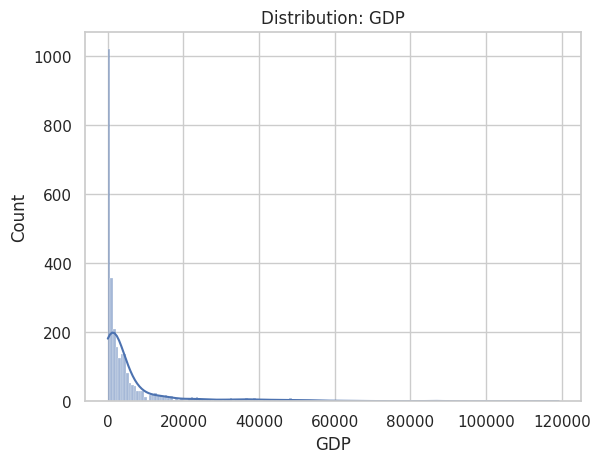

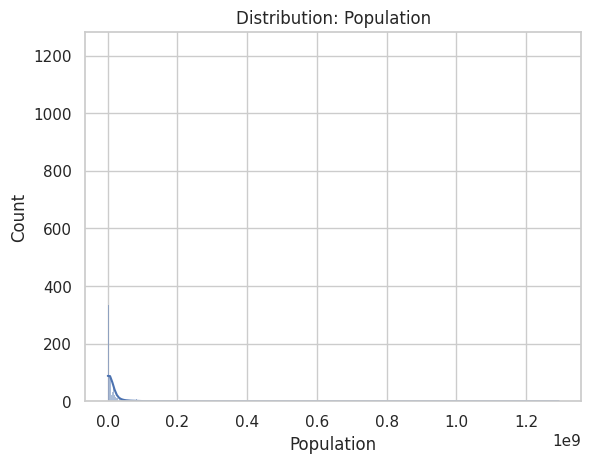

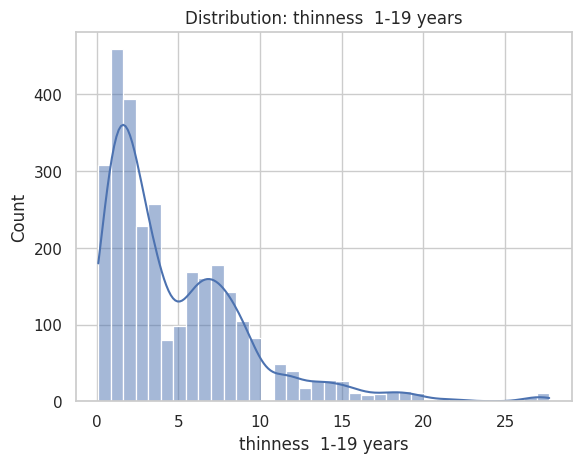

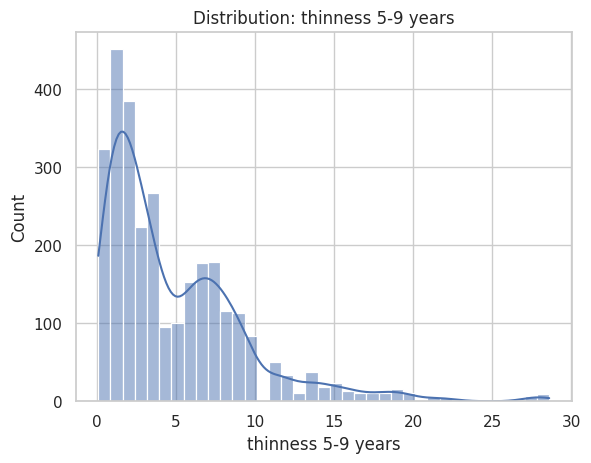

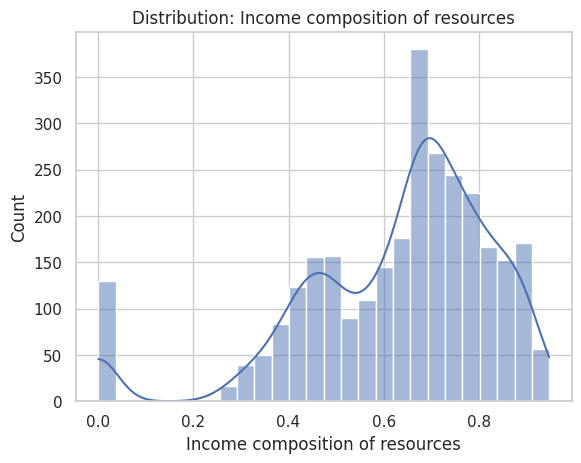

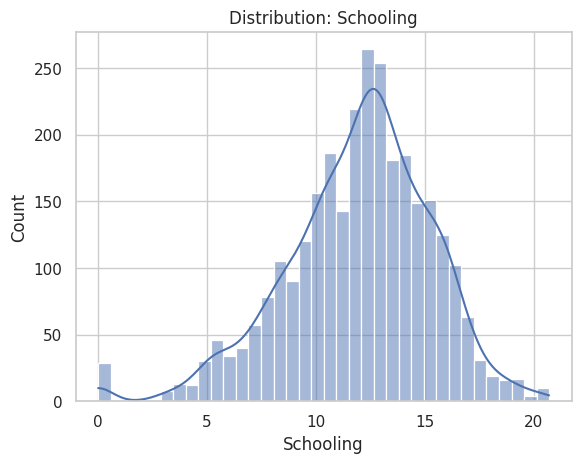

In [ ]:
# ✅ STEP 9: PLOTTING DISTRIBUTIONS

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')
    plt.show()


In [ ]:
df_copy = df.copy()
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Calculate skewness
skew_vals = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skew_vals[abs(skew_vals) > 1]
print("Highly skewed features:\n", high_skew)

# Step 3: Apply log or sqrt transformation
for col in high_skew.index:

    # Square root for values including 0 or negative
    #df[col] = np.sqrt(df[col] - df[col].min() + 1)

    # Log transform for positive values
    df[col] = np.log(df[col] + 1)


Highly skewed features:
 Population                         16.846540
infant deaths                       9.781965
under-five deaths                   9.490216
Measles                             9.436511
HIV/AIDS                            5.393357
percentage expenditure              4.649676
GDP                                 3.447996
thinness 5-9 years                  1.768359
thinness  1-19 years                1.701364
Adult Mortality                     1.176283
Income composition of resources    -1.211907
Hepatitis B                        -1.897973
Diphtheria                         -2.081226
Polio                              -2.107833
dtype: float64



Skewness of 'Population': Before = 16.85, After = -0.67

Skewness of 'infant deaths': Before = 9.78, After = 0.70

Skewness of 'under-five deaths': Before = 9.49, After = 0.65

Skewness of 'Measles': Before = 9.44, After = 0.56


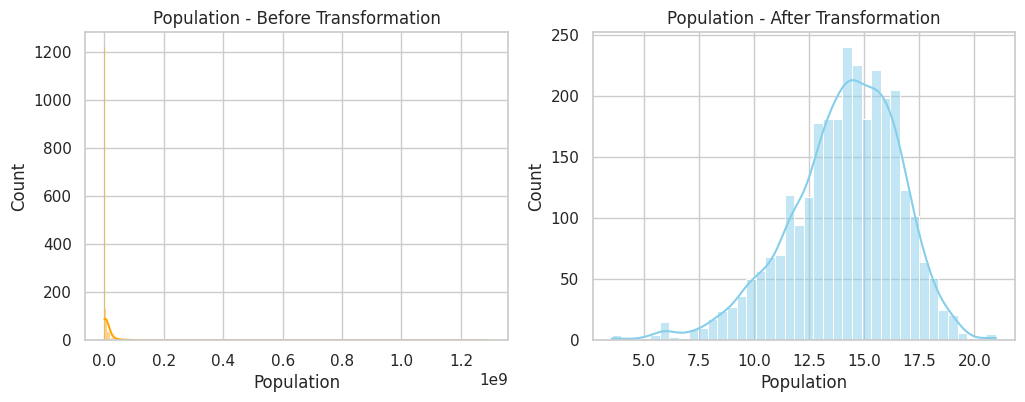

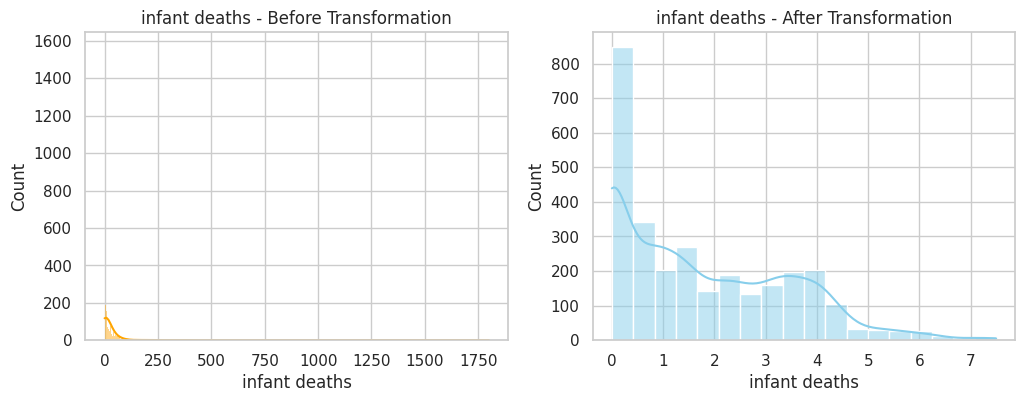

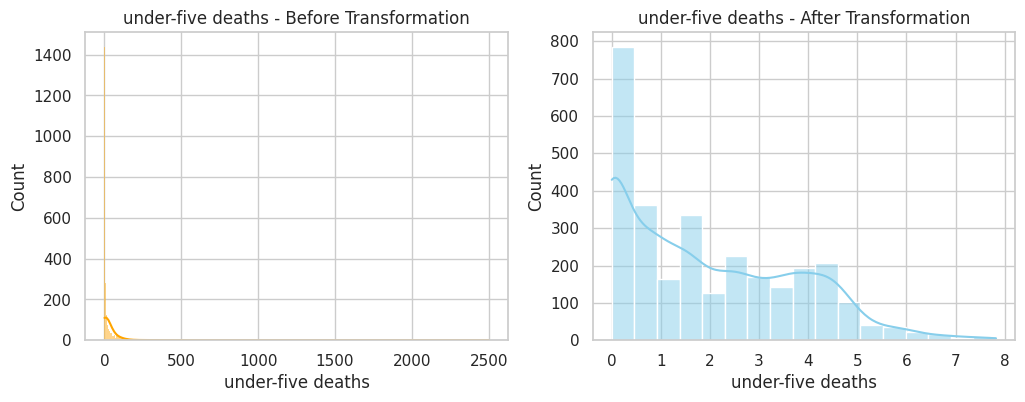

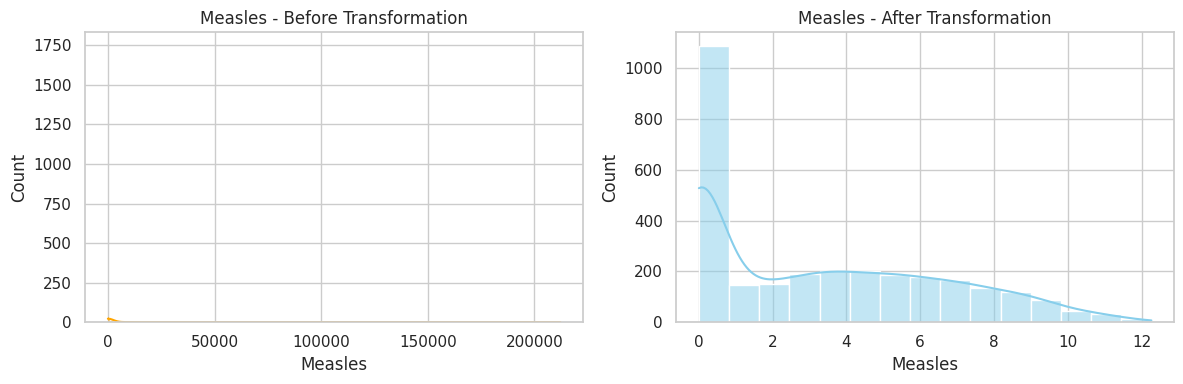

In [ ]:
#Step 5: Plot before and after distributions
features_to_plot = high_skew.index[:4]  # Choose top 4 skewed features

for feature in features_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before transformation
    sns.histplot(df_copy[feature], kde=True, ax=axes[0], color='orange')
    axes[0].set_title(f"{feature} - Before Transformation")

    # After transformation
    sns.histplot(df[feature], kde=True, ax=axes[1], color='skyblue')
    axes[1].set_title(f"{feature} - After Transformation")

    # Show skewness values
    original_skew = skew(df_copy[feature].dropna())
    new_skew = skew(df[feature].dropna())
    print(f"\nSkewness of '{feature}': Before = {original_skew:.2f}, After = {new_skew:.2f}")

plt.tight_layout()
plt.show()

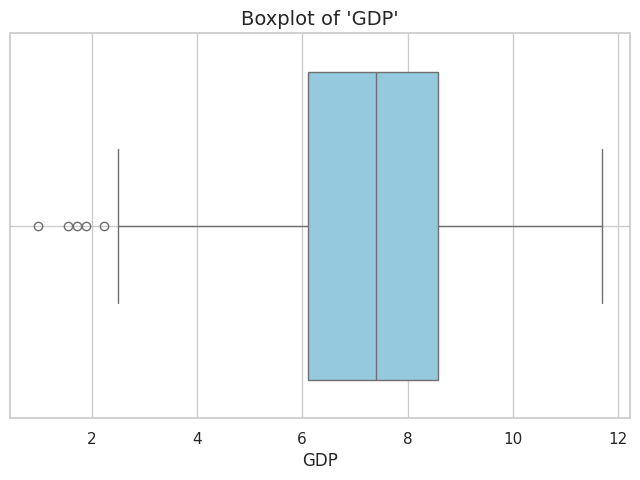

In [ ]:

# Replace with your actual column name
column = 'GDP'  # Example: 'Life_expectancy' or 'BMI'

# Draw boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[column], color='skyblue')
plt.title(f"Boxplot of '{column}'", fontsize=14)
plt.xlabel(column)
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'], dtype='object')

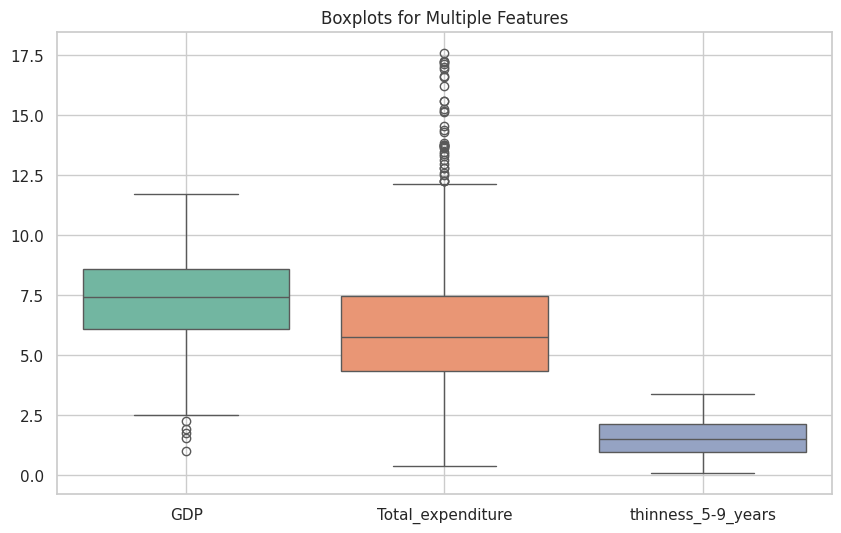

In [ ]:
# List of numeric columns to plot
columns_to_plot = ['GDP', 'Total_expenditure', 'thinness_5-9_years']

# Draw multiple boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_plot], palette='Set2')
plt.title("Boxplots for Multiple Features")
plt.grid(True)
plt.show()


In [ ]:
df.columns

In [ ]:
# 🛠 Function to compute IQR-based whiskers
def get_whiskers(series):
    Q1 = np.percentile(series.dropna(), 25)
    Q3 = np.percentile(series.dropna(), 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# 🎯 Columns to check for outliers
outlier_cols = ['GDP', 'Total_expenditure', 'thinness_5-9_years', 'thinness__1-19_years']

# 📊 Loop through columns and report before/after stats
for col in outlier_cols:
    lower, upper = get_whiskers(df[col])

    before_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    print(f"\n📌 Column: {col}")
    print(f"Before Outlier Handling:")
    print(f"  ➤ Lower Bound: {lower:.2f}")
    print(f"  ➤ Upper Bound: {upper:.2f}")
    print(f"  ➤ Outliers Detected: {before_outliers}")
    print(f"  ➤ Min/Max Before: {df[col].min():.2f} / {df[col].max():.2f}")

    # Clip outliers
    df[col] = np.clip(df[col], lower, upper)

    print(f"After Outlier Handling:")
    print(f"  ➤ Min/Max After: {df[col].min():.2f} / {df[col].max():.2f}")


📌 Column: GDP
Before Outlier Handling:
  ➤ Lower Bound: 2.37
  ➤ Upper Bound: 12.31
  ➤ Outliers Detected: 5
  ➤ Min/Max Before: 0.99 / 11.69
After Outlier Handling:
  ➤ Min/Max After: 2.37 / 11.69

📌 Column: Total_expenditure
Before Outlier Handling:
  ➤ Lower Bound: -0.38
  ➤ Upper Bound: 12.13
  ➤ Outliers Detected: 38
  ➤ Min/Max Before: 0.37 / 17.60
After Outlier Handling:
  ➤ Min/Max After: 0.37 / 12.13

📌 Column: thinness_5-9_years
Before Outlier Handling:
  ➤ Lower Bound: -0.77
  ➤ Upper Bound: 3.83
  ➤ Outliers Detected: 0
  ➤ Min/Max Before: 0.10 / 3.39
After Outlier Handling:
  ➤ Min/Max After: 0.10 / 3.39

📌 Column: thinness__1-19_years
Before Outlier Handling:
  ➤ Lower Bound: -0.77
  ➤ Upper Bound: 3.83
  ➤ Outliers Detected: 0
  ➤ Min/Max Before: 0.10 / 3.36
After Outlier Handling:
  ➤ Min/Max After: 0.10 / 3.36


In [ ]:
# ✅ STEP 12: CATEGORICAL ENCODING

# What? Convert categorical to numeric
# Why? ML algorithms can't handle strings
# How? One-Hot Encoding

df = pd.get_dummies(df, columns=['Country', 'Status'], drop_first=True)


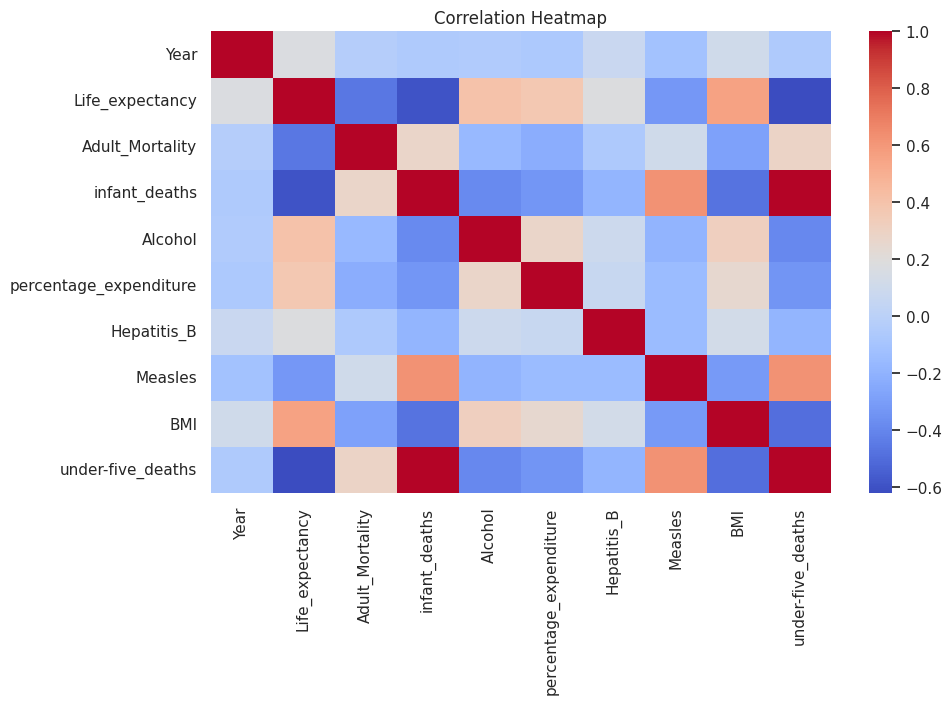

In [ ]:
# ✅ STEP 13: CORRELATION ANALYSIS

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:,:10].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.head()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Niue,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,5.575949,4.143135,0.01,4.280542,4.189655,7.051856,19.1

In [ ]:
# ✅ STEP 11: FEATURE SCALING

# Scaling normalizes feature ranges
# Important for algorithms like KNN, SVM
# Common types:
# StandardScaler: z = (x - mean) / std
# MinMaxScaler: x_scaled = (x - min) / (max - min)

# Choose one:
scaler = StandardScaler()
# scaler = MinMaxScaler()

scaled_cols = df.select_dtypes(include='number').columns
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df.head()


,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Congo,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czechia,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Gambia,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran (Islamic Republic of),Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Micronesia (Federated States of),Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Niue,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Kitts and Nevis,Country_Saint Lucia,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Sao Tome and Principe,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,1.621762,-0.445655,0.818725,1.428097,-1.140841,0.107812,-0.191823,